BERTELOOT Emile

DE SCHAMPHELEIRE Ben

In [ ]:
from google.colab import files
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import random
import time
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report

Clone the images from a GitHub repository

In [ ]:
!git clone https://github.com/BenDeSchampheleire/Machine_Learning_ISAR.git

Cloning into 'Machine_Learning_ISAR'...
remote: Enumerating objects: 821, done.
remote: Counting objects: 100% (821/821), done.
remote: Compressing objects: 100% (817/817), done.
remote: Total 821 (delta 5), reused 820 (delta 4), pack-reused 0
Receiving objects: 100% (821/821), 14.77 MiB | 18.78 MiB/s, done.
Resolving deltas: 100% (5/5), done.


#BE noté : Classification des cibles radar à partir des images ISAR (Radar à synthèse d'ouverture inverse)

## Partie 1: Analyse des données ISAR

### Question 1

#### a)

In [ ]:
path = os.path.expanduser('/content/Machine_Learning_ISAR/Images_ISAR')
files = glob.glob(path + "/*.bmp") #Get the bmp files of the database

"""
Extracts the image's class and identifier from the image path.
"""
def extract_name(file):
    file_name = file.split('/')[-1]
    file_name_no_extension = file_name.split('.bmp')[0]
    class_image = file_name_no_extension.split('_')[0]
    number_image = file_name_no_extension.split('_')[1]
    return class_image, number_image

In [ ]:
dic = {}
for f in files:
    class_image, number_image = extract_name(f)
    try: 
        dic[class_image] +=1
    except KeyError:
        dic[class_image] = 1

There are 5 classes, named:  

In [ ]:
print(dic.keys())

dict_keys(['F4', 'F15', 'F16', 'A10', 'F14'])


Each containing the following number of images (respectively):

In [ ]:
print(dic.values())

dict_values([162, 162, 162, 162, 162])


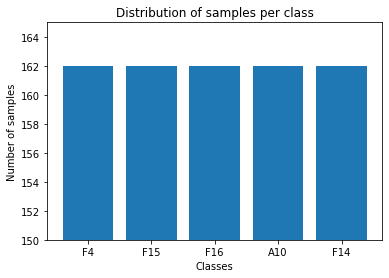

In [ ]:
plt.bar( dic.keys(), dic.values() )
plt.title('Distribution of samples per class')
plt.xlabel('Classes')
plt.ylabel('Number of samples')
plt.ylim((150, 165))
plt.show()

We see that the images are distributed uniformly over the different classes (balanced).

#### b)

Number of images in the database:

In [ ]:
print(len(files))

810


In [ ]:
img = np.array(Image.open(files[0]))

Size of one image:

In [ ]:
print(img.shape)

(256, 256)


In [ ]:
max = 0
min = 256
for f in files:
  i = np.array(Image.open(f))
  if np.min(i) < min:
    min = np.min(i)
  
  if np.max(i) > max:
    max = np.max(i)


with a minimal value of:

In [ ]:
print(min)

0


and a maximal value of:

In [ ]:
print(max)

255


Thus, every image is composed of 256x256 pixels, each containing one byte of data

#### c)

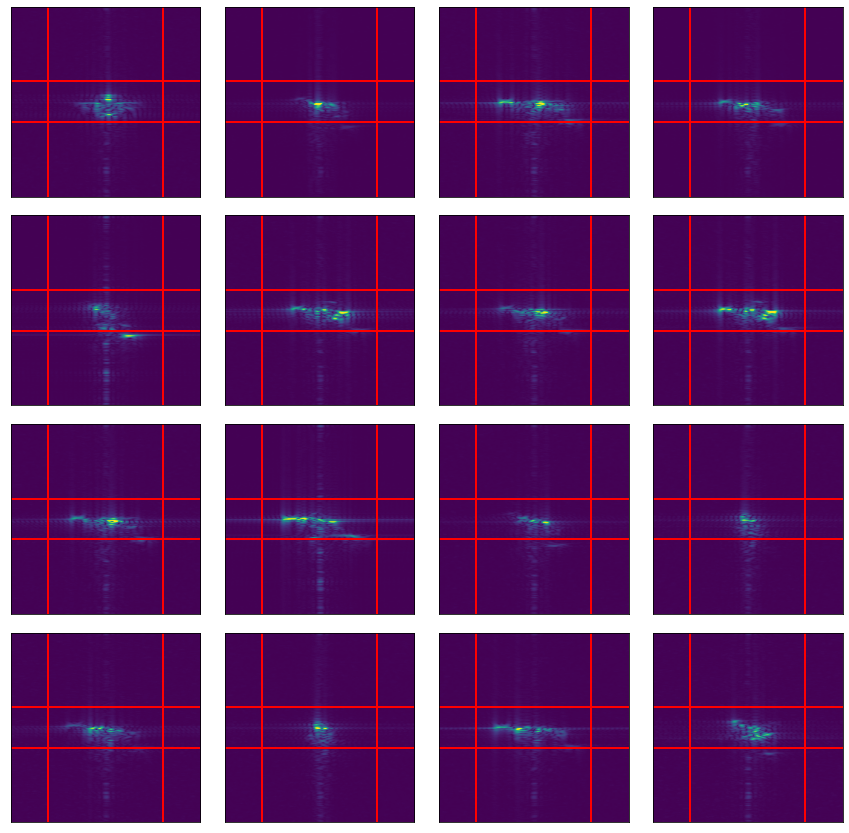

In [ ]:
x_crop = 50
y_crop = 100
fig, axs = plt.subplots(4, 4, figsize=(15, 15), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i in range(axs.shape[0]):
    for j in range(axs.shape[1]):
        file = random.choice(files) # we choose a random file to show the cropping
        axs[i,j].imshow(Image.open(file))
        axs[i,j].plot([x_crop, x_crop], [0, 255], 'r-', lw=2)
        axs[i,j].plot([255 - x_crop, 255 - x_crop], [0, 255], 'r-', lw=2)
        axs[i,j].plot([0, 255], [y_crop, y_crop], 'r-', lw=2)
        axs[i,j].plot([0, 255], [255 - y_crop, 255 - y_crop], 'r-', lw=2)
plt.show()

We save the cropped images to a new directory.

In [ ]:
!mkdir /content/Machine_Learning_ISAR/Images_ISAR_cropped

In [39]:
for f in files:
  image = np.array( Image.open(f) )
  class_image, number_image = extract_name(f)
  print(class_image)
  print(number_image)
  image_cropped = image[y_crop:255-y_crop, x_crop:255-x_crop]
  new_image = Image.fromarray(image_cropped)
  new_image.save('/content/Machine_Learning_ISAR/Images_ISAR_cropped/' + class_image + '_' + number_image + '_cropped.bmp')

F4
18
F15
71
F4
68
F15
25
F15
137
F4
102
F15
153
F16
83
F16
63
F4
135
F15
126
A10
106
F14
62
F16
41
F15
91
F14
135
F16
13
A10
25
F15
128
A10
115
A10
101
F16
134
F14
76
F14
77
A10
149
F14
58
F15
14
F16
102
F15
98
F4
128
F4
28
A10
94
F16
103
F14
101
F14
156
F15
149
F14
78
F14
66
A10
148
F4
158
F4
145
F4
125
F16
145
F16
129
F16
154
F15
72
A10
16
F15
74
F4
35
F14
87
F16
135
F14
133
F14
122
F16
56
F15
29
F14
131
F16
100
F15
42
F15
152
F14
88
A10
11
F15
69
F4
129
A10
113
A10
159
F4
2
F16
96
A10
158
F15
143
F16
148
F14
158
F16
12
A10
136
F14
44
F15
16
F15
145
F14
48
F14
148
F4
85
A10
87
F4
123
F16
10
F14
93
F4
29
F16
117
F4
47
F15
19
F16
36
A10
55
F4
88
F15
130
A10
114
F15
157
F15
41
A10
62
F4
58
F15
109
A10
124
F4
8
A10
142
F14
10
A10
109
F15
134
A10
92
F4
30
F4
113
F15
59
F16
101
F15
76
F15
64
A10
93
F16
141
A10
118
F16
156
F16
151
A10
108
F4
3
F4
162
A10
2
F15
32
F16
60
F14
138
A10
90
F15
117
A10
78
A10
126
A10
80
F15
132
A10
143
A10
66
F4
66
F16
89
F14
27
A10
63
F14
149
A10
161
F15
30
F14

To verify, we plot both versions of the first image

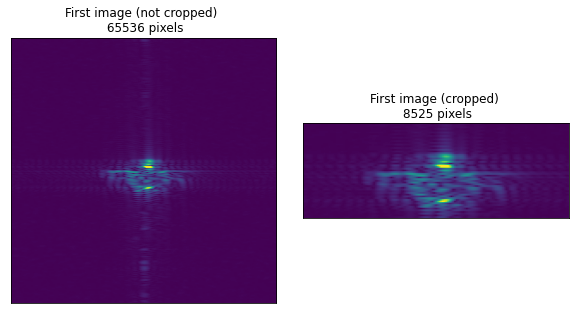

In [ ]:
first_image = np.array( Image.open('/content/Machine_Learning_ISAR/Images_ISAR/A10_1.bmp') )
first_image_cropped = np.array( Image.open('/content/Machine_Learning_ISAR/Images_ISAR_cropped/A10_1_cropped.bmp') )

fig, axs = plt.subplots(1, 2, figsize=(10, 10), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))

axs[0].imshow( first_image )
axs[0].title.set_text('First image (not cropped) \n {} pixels'.format(first_image.size))
axs[1].imshow( first_image_cropped )
axs[1].title.set_text('First image (cropped) \n {} pixels'.format(first_image_cropped.size))
plt.show()

We we able to reduce the number of pixels from:

In [ ]:
print(first_image.size)

65536


to:

In [ ]:
print(first_image_cropped.size)

8525


### Question 2

In [ ]:
path_of_the_dataset_directory = '/content/Machine_Learning_ISAR/Images_ISAR_cropped'
new_path = os.path.expanduser(path_of_the_dataset_directory)
files_cropped = glob.glob(new_path + "/*.bmp") #Get the bmp files of the database

In [ ]:
"""
Load every image from a certain directory (path). Flattens the image and fills the columns of X while adding the class name to y.
"""
def load_bdd(path):
  files = glob.glob(path + "/*.bmp") #Get the bmp files of the database

  size = Image.open(files[0]).size
  numel = size[0]*size[1]
  X = np.zeros([numel, len(files)])
  y = []
  for i in range(len(files)):
        X[:,i] = np.array( Image.open(files[i]) ).flatten()
        class_image, number_image = extract_name(files[i])
        y.append(class_image)
  return X, y

In [ ]:
X, y = load_bdd(path)

## Partie 2: Extraction des caractéristiques discriminantes – Image polaire

### Question 1

In [ ]:
def polaire(image_cart, N_r=50, M_theta=50, R_max=50):
  x0 = np.floor( 0.5*image_cart.shape[0] )
  y0 = np.floor( 0.5*image_cart.shape[1] )
  R_min = 0

  delta_r = (R_max - R_min)/(N_r - 1)
  delta_theta = 2*np.pi/(M_theta - 1)

  image_pol = np.zeros([N_r, M_theta])
  for m in range(N_r):
    r_m = R_min + (m-1)*delta_r
    for n in range(M_theta):
      theta_n = -np.pi + (n-1)*delta_theta
      x = x0 + r_m*np.cos(theta_n)
      y = y0 + r_m*np.sin(theta_n)
      image_pol[m,n] = image_cart[round(x), round(y)]

  return Image.fromarray( image_pol )

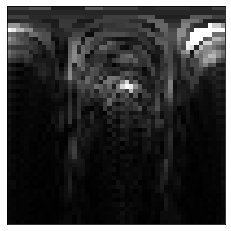

In [ ]:
first_image_polar = polaire(first_image)
plt.imshow(first_image_polar)
plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, right=False, left=False, labelleft=False)
plt.show()

The polar image has following dimensions:

In [ ]:
print(np.array(first_image_polar).shape)

(50, 50)


The size of the representation space is 50x50, so 2500.

Because we have a smaller (polar) resolution than originally the case, we had to use some sort of approximation. This is found in the round() of the indices x and y. 

### Question 2

#### a)

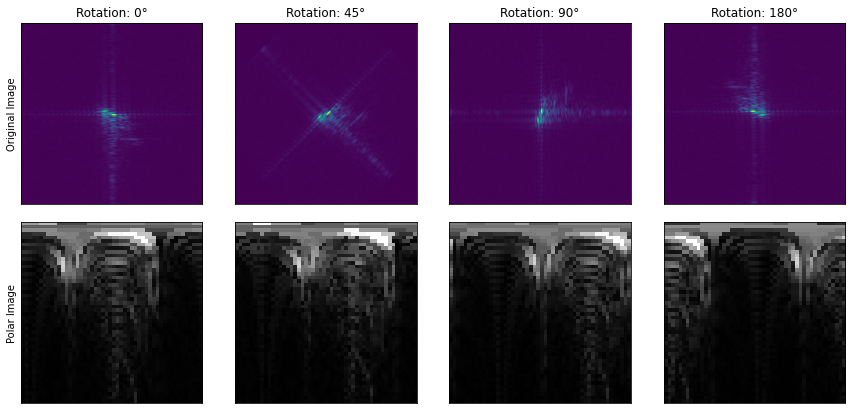

In [ ]:
file = random.choice(files)

fig, axs = plt.subplots(2, 4, figsize=(15,7), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
      
for i, r in enumerate([0, 45, 90, 180]):
  image_rotated = Image.open(file).rotate(r)
  axs[0, i].imshow(image_rotated)
  axs[0, i].set_title('Rotation: ' + str(r) + '°')
  axs[1, i].imshow( polaire( np.array(image_rotated) ) )

axs[0,0].set_ylabel('Original Image')
axs[1,0].set_ylabel('Polar Image')

fig.show()

We notice that the rotation in the cartesian plane corresponds to a onedimensional translation in the polar plane (in this case in the horizontal direction). This makes sense because the polar plane is based on a radius and an angle, therefore any rotation in the cartesian plane corresponds to a change of angle and thus a onedimensional translation in the polar plane.

#### b)

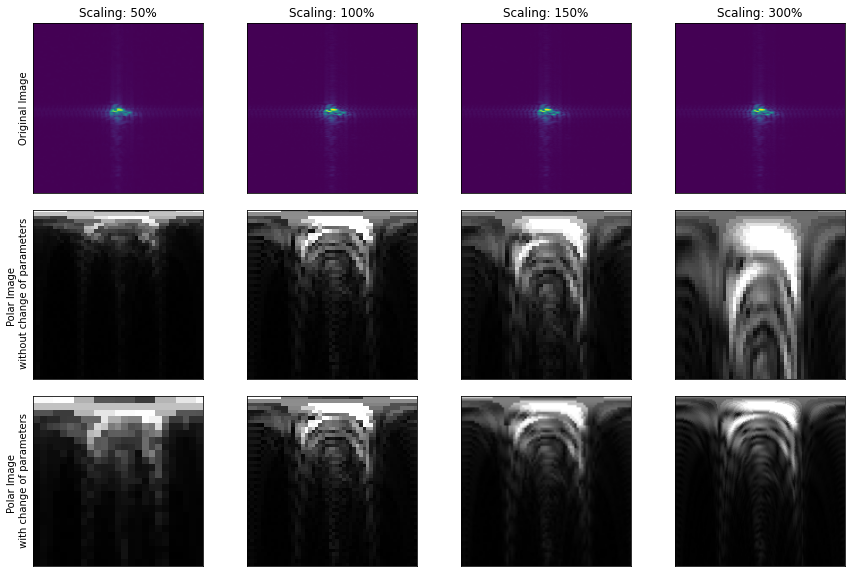

In [ ]:
file = random.choice(files)
image = Image.open(file)

fig, axs = plt.subplots(3, 4, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
      
for i, s in enumerate([0.5, 1.0, 1.5, 3.0]):
  new_size = ( round( s*image.size[0] ), round( s*image.size[1] ) )
  image_scaled = image.resize(new_size)
  axs[0, i].imshow(image_scaled)
  axs[0, i].set_title('Scaling: ' + str(int(100*s)) + '%')
  axs[1, i].imshow( polaire( np.array(image_scaled) ) )
  axs[2, i].imshow( polaire( np.array(image_scaled), int(s*50), int(s*50), int(s*50) ) )

  
axs[0,0].set_ylabel('Original Image')
axs[1,0].set_ylabel('Polar Image \n without change of parameters')
axs[2,0].set_ylabel('Polar Image \n with change of parameters')

fig.show()

We observe that when rescaling the original image, one needs to scale the input parameters of the function `polaire()`. This is due to the fact that those input parameters determine the resolution of the polr image, but more importantly the maximal range. If the original image is rescaled but the maximal range is not, one can observe the polar image to be 'stretched out' in the direction of the range (in this case the vertical direction). Moreover, given the modified size of the original image and adjusted parameters, one can observe a tremendous change of the percieved resolution. This is due to the algorithm of the function `.resize()`, which uses a resampling filter.



#### c)

Intuitively, if the original image were to be translated, the origin of the polar image, or `(x0,y0)` as we called it, would have to be shifted correspondingly.

### Question 3

#### a)

In [ ]:
def polaire1(image_cart, N_r=50, M_theta=50, R_max=50):
  x0 = np.floor( 0.5*image_cart.shape[0] )
  y0 = np.floor( 0.5*image_cart.shape[1] )
  R_min = 0

  delta_r = (R_max - R_min)/(N_r - 1)
  delta_theta = 2*np.pi/(M_theta - 1)

  image_pol = np.zeros([N_r, M_theta])
  for m in range(N_r):
    r_m = R_min + (m-1)*delta_r
    for n in range(M_theta):
      theta_n = -np.pi + (n-1)*delta_theta
      x = x0 + r_m*np.cos(theta_n)
      y = y0 + r_m*np.sin(theta_n)
      image_pol[m,n] = image_cart[round(x), round(y)]

  I_r = np.sum(image_pol, axis=1) / np.linalg.norm( np.sum(image_pol, axis=1) ) # normalized wrt the norm of the vector
  I_theta = np.sum(image_pol, axis=0) / np.linalg.norm( np.sum(image_pol, axis=0) ) # normalized wrt the norm of the vector
  
  return Image.fromarray( image_pol ), I_r, I_theta

In [ ]:
def eucli_dist(x,y):
  return np.sqrt(np.sum(np.square(x-y)))

**Rotation**

Distance Euclidienne (0°) 	 |  I_r: 0.0 	  | I_Theta: 0.0 	 | I_polar: 0.0
Distance Euclidienne (45°) 	 |  I_r: 0.04911129861212781 	  | I_Theta: 0.4534501070648873 	 | I_polar: 5869.25341796875
Distance Euclidienne (90°) 	 |  I_r: 0.10208080012755875 	  | I_Theta: 0.4979269138646472 	 | I_polar: 6304.97265625
Distance Euclidienne (180°) 	 |  I_r: 0.32176746849452253 	  | I_Theta: 0.6124792449648374 	 | I_polar: 6713.11962890625


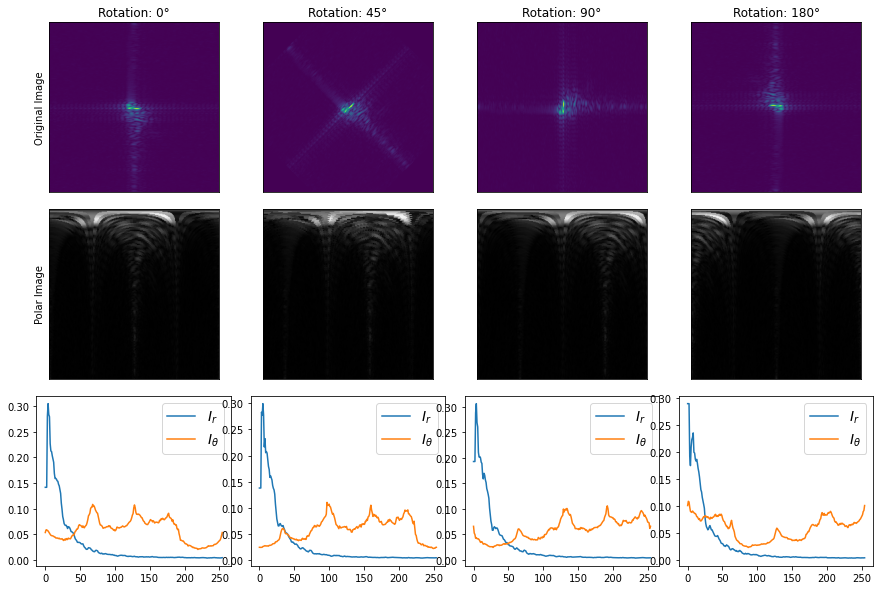

In [ ]:
file = random.choice(files)

fig, axs = plt.subplots(3, 4, figsize=(15,10), gridspec_kw=dict(hspace=0.1, wspace=0.1))

image_nr = Image.open(file)
image_nr_polar, I_r_nr, I_theta_nr = polaire1( np.array(image_nr), 255,255,125 )
      
for i, r in enumerate([0, 45, 90, 180]):
  image_rotated = Image.open(file).rotate(r)
  image_rotated_polar, I_r, I_theta = polaire1( np.array(image_rotated), 255,255,125 )

  print("Distance Euclidienne ({}°) \t |  I_r: {} \t  | I_Theta: {} \t | I_polar: {}".format( r, eucli_dist(I_r,I_r_nr), eucli_dist(I_theta,I_theta_nr), eucli_dist(np.array(image_nr_polar),np.array(image_rotated_polar)) ))
  axs[0, i].imshow(image_rotated)
  axs[0, i].set_title('Rotation: ' + str(r) + '°')
  axs[0, i].set_xticks([])
  axs[0, i].set_yticks([])

  axs[1, i].imshow( image_rotated_polar )
  axs[1, i].set_xticks([])
  axs[1, i].set_yticks([])

  axs[2, i].plot(I_r, label=r'$I_r$')
  axs[2, i].plot(I_theta, label=r'$I_{\theta}$')
  axs[2, i].legend(prop={'size': 14})

axs[0,0].set_ylabel('Original Image')
axs[1,0].set_ylabel('Polar Image')

fig.show()

We observe that the $I_r$-vector is almost unchanged by the rotational transformation. The small value of the euclidian distance confirms this. The fact that it is not equal to zero is due to the sampling of the rotation algorithm. The invariance is logical since the polar image solely translates in the $\theta$-direction. Therefore, we can observe the $I_{\theta}$-vector is shifted similarly to the polar image. This also shows in the euclidian distance, which is significantly higher than the corresponding values for $I_r$.

**Note**: we increased the parameters of the function in order to increase the polar resolution. In this way, the two vectors are less influenced by the approximation losses when transforming an image from cartesian to polar.

**Note**: The value of euclidian for the polars image was not normalized, therefore it is not between 0 and 1.



**Resize**

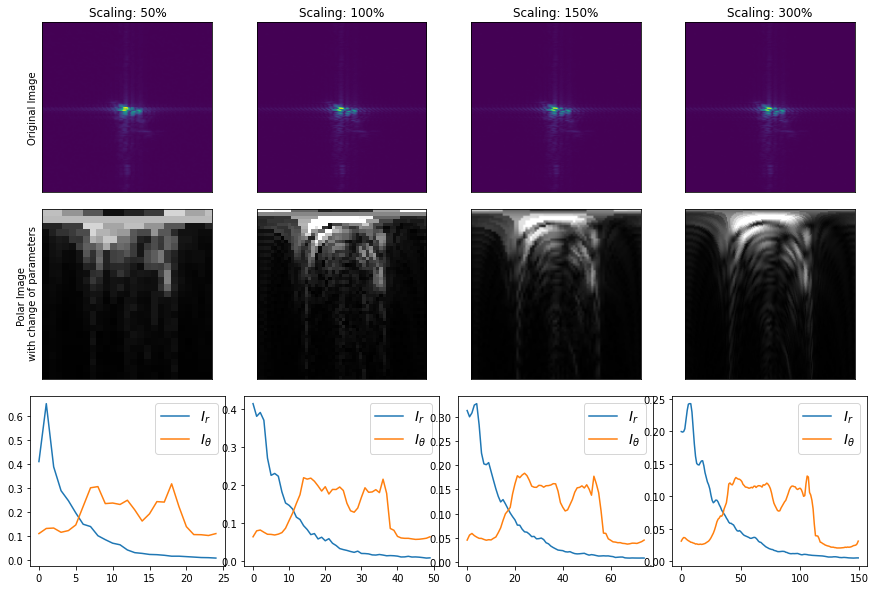

In [ ]:
file = random.choice(files)
image = Image.open(file)

fig, axs = plt.subplots(3, 4, figsize=(15,10), gridspec_kw=dict(hspace=0.1, wspace=0.1))
     
for i, s in enumerate([0.5, 1.0, 1.5, 3.0]):
  new_size = ( round( s*image.size[0] ), round( s*image.size[1] ) )
  image_scaled = image.resize(new_size)
  image_scaled_polar, I_r, I_theta = polaire1( np.array(image_scaled), int(s*50), int(s*50), int(s*50) )
  
  axs[0, i].imshow(image_scaled)
  axs[0, i].set_title('Scaling: ' + str(int(100*s)) + '%')
  axs[0, i].set_xticks([])
  axs[0, i].set_yticks([])

  axs[1, i].imshow(image_scaled_polar)
  axs[1, i].set_xticks([])
  axs[1, i].set_yticks([])

  axs[2, i].plot(I_r, label=r'$I_r$')
  axs[2, i].plot(I_theta, label=r'$I_{\theta}$')
  axs[2, i].legend(prop={'size': 14})

axs[0,0].set_ylabel('Original Image')
axs[1,0].set_ylabel('Polar Image \n with change of parameters')

fig.show()

We observe that the general outline of both vectors is not influenced by the resizing of the original image. Only the magnitude of their values and their length has changed. When the image is enlarged (resize > 100%), then the polar resolution is augmented and thus also the length of $I_r$/$I_{\theta}$.

#### b)

In [ ]:
file = random.choice(files)

I_theta_vec = []
for r in range(0,370,10):
  image_rotated = Image.open(file).rotate(r)
  _, _, I_theta = polaire1( np.array(image_rotated), 255,255,125 )
  I_theta_vec.append(I_theta)

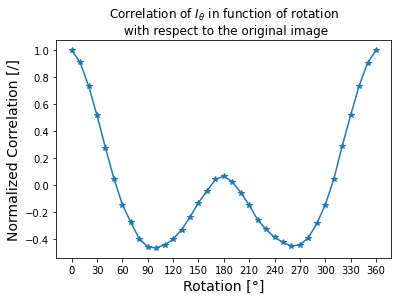

In [ ]:
fig, ax = plt.subplots()

corr = []
for i in range(0, len(I_theta_vec)):
  corr.append( np.corrcoef(I_theta_vec[0], I_theta_vec[i])[0,1] )

plt.plot(corr,'*-')
ax.set_xlabel('Rotation [°]', fontsize=14)
ax.set_xticks( range(0, len(I_theta_vec),3) )
ax.set_xticklabels( range(0,390,30) )
ax.set_ylabel('Normalized Correlation [/]', fontsize=14)
ax.set_title(r'Correlation of $I_{\theta}$ in function of rotation' +  '\n with respect to the original image')
plt.show()

The correlation coefficient is maximal when the rotation is equal to 0° or 360°, because the image is then unchanged. Therefore, the vector $I_{\theta}$ remains the same, resulting in a correlation of 1. Furthermore, we can see that the correlation is minimal for a rotation around 180°. In this case, the image is mirrored and does not resemble at all to the original.

#### c)

The size of the space of caracteristics is the sum of the size of the polar image, $I_r$ and $I_{\theta}$, so:

`2500+2*50 = 2600`

The gain is approximatly equal to:

`( (256² - 2600)/256² )*100% ~ 96%`

## Partie 3: Classification - Reconnaissance

### Question 1

In [ ]:
file = random.choice(files)
image = Image.open(file)
img_pol,I_r,I_theta = polaire1(np.array(image))
print("Size of img_pol",img_pol.size)
print("Size of I_r",I_r.size)
print("Size of I_theta",I_theta.size)
print("Number of Descriptor",I_r.size + I_theta.size + I_r.size*I_theta.size)
print("Number of Samples",len(files))

def descripteursBDD():
  d = {"A10":0,"F4":1,"F14":2,"F15":3,"F16":4}
  M = np.ones((810,2600))
  Y = -1*np.ones(810) # times -1 to be able to debug in case of problems (because 1 is an element of the dictionary)
  for i in range(len(files)):
    image = Image.open(files[i])
    img_pol,I_r,I_theta = polaire1(np.array(image))
    M[i,:2500] = np.array(img_pol).flatten()
    M[i,2500:2550] = I_r
    M[i,2550:] = I_theta
    Y[i] = d[y[i]]
  return M,Y

data,Y = descripteursBDD()
print("Size of data : ",data.shape)
print("Size of Y    : ",Y.shape)

Size of img_pol (50, 50)
Size of I_r 50
Size of I_theta 50
Number of Descriptor 2600
Number of Samples 810
Size of data :  (810, 2600)
Size of Y    :  (810,)


### Question 2

In [ ]:
def reconnaissance(data,y):
  return train_test_split(data, y, test_size=0.33,random_state=42)
  
X_train, X_test, y_train, y_test = reconnaissance(data,Y)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(542, 2600)
(542,)
(268, 2600)
(268,)


### Question 3

In [ ]:
X_train_I_r = X_train[:,2500:2550]
X_test_I_r = X_test[:,2500:2550]
for k in [5,3,1]:
  t_start = time.time()
  neigh_1 = KNeighborsClassifier(n_neighbors=k)
  neigh_1.fit(X_train_I_r, y_train)
  y_pred_1 = neigh_1.predict(X_test_I_r)
  C_1 = confusion_matrix(y_test,y_pred_1)
  print("k : {} -> {} s ".format(k,time.time()-t_start))
  print(classification_report(y_pred_1, y_test))

k : 5 -> 0.02278280258178711 s 
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        60
         1.0       1.00      0.98      0.99        53
         2.0       0.98      0.94      0.96        51
         3.0       0.96      1.00      0.98        50
         4.0       0.98      1.00      0.99        54

    accuracy                           0.98       268
   macro avg       0.98      0.98      0.98       268
weighted avg       0.98      0.98      0.98       268

k : 3 -> 0.015082359313964844 s 
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        61
         1.0       1.00      1.00      1.00        52
         2.0       1.00      1.00      1.00        49
         3.0       1.00      1.00      1.00        52
         4.0       0.98      1.00      0.99        54

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg

We can clearly observe that the total accuracy of the different methods of K-neighbours (can be read in the row of 'accuracy') lies around 99%. Besides, as a general trend, the time for calculating decreases when considering less neigbors (smaller k).

### Question 4

In [ ]:
X_train_I_r_plus_theta = X_train[:,2500:2550] + X_train[:,2550:]
X_test_I_r_plus_theta = X_test[:,2500:2550] + X_test[:,2550:]
for k in [5,3,1]:
  t_start = time.time()
  neigh = KNeighborsClassifier(n_neighbors=k)
  neigh.fit(X_train_I_r_plus_theta, y_train)
  y_pred = neigh.predict(X_test_I_r_plus_theta)
  C = confusion_matrix(y_test,y_pred)
  
  print("k : {} -> {} s ".format(k,time.time()-t_start))
  print(classification_report(y_pred, y_test))

k : 5 -> 0.0173494815826416 s 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        60
         1.0       1.00      1.00      1.00        52
         2.0       1.00      1.00      1.00        49
         3.0       1.00      1.00      1.00        52
         4.0       1.00      1.00      1.00        55

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268

k : 3 -> 0.015334606170654297 s 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        60
         1.0       1.00      1.00      1.00        52
         2.0       1.00      1.00      1.00        49
         3.0       1.00      1.00      1.00        52
         4.0       1.00      1.00      1.00        55

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg 

We can clearly observe that the total accuracy of the different methods of K-neighbours (can be read in the row of 'accuracy') lies around 100%. In general, the accuracy has improved with respect to the previous question. Besides, as a general trend, the time for calculating decreases when considering less neigbors (smaller k).

### Question 5

#### a)

In [ ]:
X_train_I_theta = X_train[:,2500:2550]
X_test_I_theta = X_test[:,2500:2550]

distances, indices = neigh_1.kneighbors(X=X_test_I_r, n_neighbors=1, return_distance=True)
distances = distances.flatten()
indices = indices.flatten()


idx = distances.argsort()
indices_sorted = indices[idx]
lambda_rate = 0.3
indices_lambda = indices_sorted[:round(len(indices_sorted)*lambda_rate)]


X_train_I_theta_lambda = X_train_I_theta[indices_lambda]
y_train_lambda = y_train[indices_lambda]


for k in [5,3,1]:
  t_start = time.time()
  neigh_2 = KNeighborsClassifier(n_neighbors=k, metric=np.corrcoef)
  neigh_2.fit(X_train_I_theta_lambda, y_train_lambda)
  y_pred_2 = neigh_2.predict(X_test_I_theta)
  C_2 = confusion_matrix(y_test,y_pred_2)
  print("k : {} -> {} s ".format(k,time.time()-t_start))
  print(classification_report(y_pred_2, y_test))

ValueError: ignored

Even though we don't the results, developping a second classifier allows to prevent 'over-learning' and makes the classifier more resilient when using other data.